# 필수과제3
- 필수적으로 공유해야 하는 내용
  - 1. 데이터 전처리 방법 정리와 시각화
    - (실제 데이터를 전처리 하는 과정에서 피처를 선택했던 이유나 전처리를 선택한 이유들을 정리해서 공유)
  - 2. 평가지표에 대한 임계값을 조절하면서 변화를 정리하자. (모델은 로지스틱으로 진행)
    - 로지스틱에 있는 위의 임계값을 조절해서 실제 매트릭스가 어떤 식으로 변하는지를 정리
    - 정확도, 정밀도, 재현율, ROC, AUC 까지 시각화를 통해 어떤 식으로 변화하는지 정리 필수
  - 3. 모델간의 비교 진행하기
    - 로지스틱, DT, RF, KNN 3개의 모델을 가지고 직접 모델링을 진행하고
    - 평가지표에 대한 비교 정리와 ROC 커브에 대한 시각화를 통해 어떤 모델을 선정할지 기준점 잡기
---
- 쥬피터 노트북으로 공유하는 것 + PDF파일로 데이터 분석 보고서를 작성해 주세요.
- 데이터 분석 보고서 분량은 10페이 내로 진행해 주시고
- 보고서를 작성하시면서 이 보고서는 평가지표에 대한 비교분석을 하는 목적이다보니 분석목적보다는 평가지표 정리에 초점을 맞춰주시고
- 다만 컬럼을 선정한 기준은 꼭 구체적으로 적어주셔야 합니다.
---
- 본인이 데이터에 대한 관계와 클래스에 대한 비교를 통해서 실제 모델의 평가지표를 어떤 것을 선정해야 하는지? 선정기준과 그 이유를 같이 정리해서
- 최종 모델의 선정 및 정확도, 정밀도, 재현율, F1스코어 ,ROC, AUC까지 정리해서 공유해 주세요.


# 1.데이터 전처리 방법 정리와 시각화



## 1. Data Load & Check
- FlightDate : 비행날짜
- Airline : 항공사
- Origin : 출발지 /  Dest : 도착지
- Cancelled : 취소여부 => 예측값(y값)
- Year , Quarter ,  Month : 연도, 분기, 월 /  DayofMonth ,  DayOfWeek : 일 , 요일
- Diverted : 방향 전환 여부 , 도착지 변경 여부
- **AirTime** : 비행시간
- Distance : 공항 간 거리

/

- CRSDepTime : CRS 출발시간 /  **DepTime** : 실제 출발시간
- CRSElapsedTime : CRS 소요시간 /  **ActualElapsedTime** : 실제 소요시간
- CRSArrTime : CRS 도착시간 / **ArrTime** : 실제 도착 시간

- **DepDelayMinutes** :  예정된 출발시간과 실제 출발시간과의 차이. 일찍 출발한 경우에는 0으로 표기
- **DepDelay** :  예정된 출발시간과 실제 출발시간과의 차이. 일찍 출발한 경우에는 음수로 표기

- ** ArrDelayMinutes** :  예정된 도착시간과 실제 도착시간과의 차이. 일찍 도착한 경우에는 0으로 표기
- **ArrDelay** : 예정된 도착시간과 실제 도착시간과의 차이. 일찍 도착한 경우에는 음수로 표기

- ** ArrDel15** : Arrival Delay Indicator, 15 Minutes or More (1=Yes)
- ** ArrivalDelayGroups** : Arrival Delay intervals, every (15-minutes from 180)

- ArrTimeBlk : CRS Arrival Time Block, Hourly Intervals
/

- Marketing_Airline_Network : 고유한 마케팅 항공사 코드. 여러 통신사에서 동일한 코드를 사용한 경우 PA, PA(1), PA(2)와 같이 이전 사용자에 대해 숫자 접미사가 사용됩니다. 다양한 연도에 대한 분석을 위해 이 필드를 사용하십시오.
- Operating_Airline  : 고유 운송업체 코드. 여러 통신사에서 동일한 코드를 사용한 경우 PA, PA(1), PA(2)와 같이 이전 사용자에 대해 숫자 접미사가 사용됩니다. 다양한 연도에 대한 분석을 위해 이 필드를 사용하십시오.

- Operated_or_Branded_Code_Share_Partners : 항공사 운영 또는 브랜드 코드 공유 파트너 보고
- DOT_ID_Marketing_Airline : 고유한 항공사(항공사)를 식별하기 위해 US DOT에서 할당한 식별 번호입니다. 고유한 항공사(항공사)는 코드, 이름 또는 지주 회사/법인에 관계없이 동일한 DOT 인증서를 보유하고 보고하는 항공사로 정의됩니다.
- DOT_ID_Operating_Airline : 고유한 항공사(항공사)를 식별하기 위해 US DOT에서 할당한 식별 번호입니다. 고유한 항공사(항공사)는 코드, 이름 또는 지주 회사/법인에 관계없이 동일한 DOT 인증서를 보유하고 보고하는 항공사로 정의됩니다.
- IATA_Code_Marketing_Airline : IATA에서 할당한 코드로 일반적으로 항공사를 식별하는 데 사용됩니다. 시간이 지남에 따라 동일한 코드가 다른 통신사에 할당될 수 있으므로 코드가 항상 고유하지는 않습니다. 분석을 위해서는 고유 운송인 코드를 사용하십시오.
- IATA_Code_Operating_Airline : IATA에서 할당한 코드로 일반적으로 항공사를 식별하는 데 사용됩니다. 시간이 지남에 따라 동일한 코드가 다른 통신사에 할당될 수 있으므로 코드가 항상 고유하지는 않습니다. 분석을 위해서는 고유 운송인 코드를 사용하십시오.
- Flight_Number_Marketing_Airline : Flight Number
- Flight_Number_Operating_Airline : 비행편 번호
- Tail_Number : 항공기 등록기

/

- OriginAirportID : Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.

- OriginAirportSeqID : Origin Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time. Airport attributes, such as airport name or coordinates, may change over time.

- OriginCityMarketID : Origin Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.

- OriginCityName : 출발공항 도시이름
- OriginState : 출발공항 주 코드
- OriginStateFips : 출발공항 주 디지털코드
- OriginStateName : 출발공항 주 이름
- OriginWac : 출발공항 세계지역코드

/

- DestAirportID : 목적지 공항, 공항 ID. 고유한 공항을 식별하기 위해 US DOT에서 할당한 식별 번호입니다. 공항에서 공항 코드를 변경할 수 있고 공항 코드를 재사용할 수 있으므로 다양한 연도에 걸친 공항 분석에 이 필드를 사용하십시오.
- DestAirportSeqID :목적지 공항, 공항 시퀀스 ID. 특정 시점에 고유한 공항을 식별하기 위해 US DOT에서 할당한 식별 번호입니다. 공항 이름이나 좌표와 같은 공항 속성은 시간이 지남에 따라 변경될 수 있습니다.
- DestCityMarketID : 대상 공항, 도시 시장 ID. City Market ID는 도시 시장을 식별하기 위해 US DOT에서 할당한 식별 번호입니다. 동일한 도시 시장에 서비스를 제공하는 공항을 통합하려면 이 필드를 사용하십시오.
- DestCityName : 도착공항 도시 이름
- DestState : 도착공항 주 코드
- DestStateFips : 도착공항 주 디지털 코드
- DestStateName : 도착공항 주 이름
- DestWac : 도착공항 세계지역코

/

- **DepDel15** : 출발 지연 표시, 15분 이상(1=예)
- **DepartureDelayGroups** : Departure Delay intervals, every (15 minutes from 180)

- DepTimeBlk : CRS 출발 시간 블록, 시간별 간격
- **TaxiOut** : 공항에서 이륙까지의 시간 / - **TaxiIn** : 착륙에서 공항까지의 시간
- **WheelsOff** / -** WheelsOn**


- DistanceGroup : Distance Intervals, every 250 Miles, for Flight Segment

- DivAirportLandings : 방향전환한 비행기 착륙 횟수

---
+) https://www.isarsoft.com/knowledge-hub/taxi-out-time

+) 굵은 글씨 : cancelled =1  데이터 중 결측치 개수가 많은 칼럼


In [3]:
# 경고무시
import warnings
warnings.filterwarnings(action  = 'ignore')

In [52]:
import pandas as pd
df = pd.read_parquet('Combined_Flights_2018.parquet')
df


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0.0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0.0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0.0
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,...,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0.0
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,...,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637609,2018-09-11,Air Wisconsin Airlines Corp,SCE,IAD,False,False,1445,1433.0,0.0,-12.0,...,1437.0,1512.0,3.0,1546,-31.0,0.0,-2.0,1500-1559,1,0.0
637610,2018-09-11,Air Wisconsin Airlines Corp,IAD,GSO,False,False,1235,1224.0,0.0,-11.0,...,1254.0,1337.0,7.0,1355,-11.0,0.0,-1.0,1300-1359,1,0.0
637611,2018-09-11,Air Wisconsin Airlines Corp,EVV,ORD,False,False,1030,1016.0,0.0,-14.0,...,1036.0,1130.0,7.0,1204,-27.0,0.0,-2.0,1200-1259,2,0.0
637612,2018-09-11,Air Wisconsin Airlines Corp,ORD,HPN,False,False,1410,1403.0,0.0,-7.0,...,1428.0,1712.0,5.0,1726,-9.0,0.0,-1.0,1700-1759,3,0.0


In [6]:
df.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5689512 entries, 0 to 637613
Data columns (total 61 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   FlightDate                               datetime64[ns]
 1   Airline                                  object        
 2   Origin                                   object        
 3   Dest                                     object        
 4   Cancelled                                bool          
 5   Diverted                                 bool          
 6   CRSDepTime                               int64         
 7   DepTime                                  float64       
 8   DepDelayMinutes                          float64       
 9   DepDelay                                 float64       
 10  ArrTime                                  float64       
 11  ArrDelayMinutes                          float64       
 12  AirTime                      

In [8]:
df.isnull().sum()

FlightDate                 0
Airline                    0
Origin                     0
Dest                       0
Cancelled                  0
                       ...  
ArrDel15              102893
ArrivalDelayGroups    102893
ArrTimeBlk                 0
DistanceGroup              0
DivAirportLandings         1
Length: 61, dtype: int64

In [9]:
len(df[df.Cancelled ==1])

88373

In [10]:
df[df.Cancelled ==1].isnull().sum().sort_values(ascending = False).head(30)

TaxiIn                  88373
ActualElapsedTime       88373
ArrivalDelayGroups      88373
ArrDel15                88373
ArrDelay                88373
AirTime                 88373
ArrDelayMinutes         88373
WheelsOn                88364
ArrTime                 88364
TaxiOut                 87703
WheelsOff               87693
DepDelayMinutes         85462
DepDel15                85462
DepartureDelayGroups    85462
DepDelay                85462
DepTime                 85360
Tail_Number             20529
CRSElapsedTime              3
DivAirportLandings          1
OriginState                 0
DepTimeBlk                  0
CRSArrTime                  0
ArrTimeBlk                  0
DestWac                     0
DestStateName               0
DestStateFips               0
DestState                   0
DestCityName                0
DestCityMarketID            0
DistanceGroup               0
dtype: int64

### 1차 칼럼 탈락 & 각 칼럼 탈락 이유
- 1. cancelled == 1인 데이터에서 해당 칼럼은 거의 결측치
  - AirTime  , ArrTime , WheelsOn, ArrivalDelayGroups,     
ArrDel15 ,ArrDelay , TaxiIn, ActualElapsedTime, ArrDelayMinutes, TaxiOut, WheelsOff, DepDelay, DepDelayMinutes, DepTime, DepartureDelayGroups,DepDel15    

- 2. 값이 하나라서
  - Year

- 3. 사실상 같은 칼럼이라서  
  - Marketing_Airline_Network  == Operated_or_Branded_Code_Share_Partners == DOT_ID_Marketing_Airline  == IATA_Code_Marketing_Airline (남김)
  - Operating_Airline == DOT_ID_Operating_Airline == IATA_Code_Operating_Airline (남김)
  - OriginAirportID == OriginAirportSeqID (남김)
  - OriginState == OriginStateFips  ==  OriginStateName (남김) == OriginWac
  - DestAirportID ==  DestAirportSeqID (남김)
  - DestState ==  DestStateFips  ==  DestStateName (남김) == DestWac
  - Flight_Number_Operating_Airline == Flight_Number_Marketing_Airline (남김)

             

In [53]:
df = df[['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime',          'CRSElapsedTime',
       'Distance',  'DayofMonth', 'DayOfWeek',
       'IATA_Code_Marketing_Airline',       'IATA_Code_Operating_Airline',
       'Flight_Number_Marketing_Airline',
       'Tail_Number',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
        'OriginStateName',
       'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestStateName',
        'DepTimeBlk', 'CRSArrTime',
       'ArrTimeBlk', 'DistanceGroup',"Quarter", "Month",
       'DivAirportLandings']]
df

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,CRSElapsedTime,Distance,DayofMonth,...,DestCityMarketID,DestCityName,DestStateName,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,Quarter,Month,DivAirportLandings
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,62.0,145.0,23,...,30397,"Atlanta, GA",Georgia,1200-1259,1304,1300-1359,1,1,1,0.0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,62.0,145.0,24,...,30397,"Atlanta, GA",Georgia,1200-1259,1304,1300-1359,1,1,1,0.0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,62.0,145.0,25,...,30397,"Atlanta, GA",Georgia,1200-1259,1304,1300-1359,1,1,1,0.0
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,62.0,145.0,26,...,30397,"Atlanta, GA",Georgia,1200-1259,1304,1300-1359,1,1,1,0.0
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,60.0,145.0,27,...,30397,"Atlanta, GA",Georgia,1400-1459,1500,1500-1559,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637609,2018-09-11,Air Wisconsin Airlines Corp,SCE,IAD,False,False,1445,61.0,133.0,11,...,30852,"Washington, DC",Virginia,1400-1459,1546,1500-1559,1,3,9,0.0
637610,2018-09-11,Air Wisconsin Airlines Corp,IAD,GSO,False,False,1235,80.0,239.0,11,...,31995,"Greensboro/High Point, NC",North Carolina,1200-1259,1355,1300-1359,1,3,9,0.0
637611,2018-09-11,Air Wisconsin Airlines Corp,EVV,ORD,False,False,1030,94.0,272.0,11,...,30977,"Chicago, IL",Illinois,1000-1059,1204,1200-1259,2,3,9,0.0
637612,2018-09-11,Air Wisconsin Airlines Corp,ORD,HPN,False,False,1410,136.0,738.0,11,...,31703,"White Plains, NY",New York,1400-1459,1726,1700-1759,3,3,9,0.0


### 결측치 제거 & 보완
- Tail_Number 결측치 존재
    - Tail_Number가 결측치인 데이터의 경우, cancelled=1인 경우 압도적으로 많음!
    - 결측치인 경우 새롭게 임의의 값을 할당하는 것으로 통일!
- DivAirportLandings 결측치 한개 행은 삭제 - index : 4541739
- CRSElapsedTime 결측치 6개 행 - 모두 삭제!

In [54]:
df.isnull().sum()

FlightDate                             0
Airline                                0
Origin                                 0
Dest                                   0
Cancelled                              0
Diverted                               0
CRSDepTime                             0
CRSElapsedTime                         6
Distance                               0
DayofMonth                             0
DayOfWeek                              0
IATA_Code_Marketing_Airline            0
IATA_Code_Operating_Airline            0
Flight_Number_Marketing_Airline        0
Tail_Number                        20548
OriginAirportSeqID                     0
OriginCityMarketID                     0
OriginCityName                         0
OriginStateName                        0
DestAirportSeqID                       0
DestCityMarketID                       0
DestCityName                           0
DestStateName                          0
DepTimeBlk                             0
CRSArrTime      

#### 1. Tail_Number 결측치 보완

In [55]:
nan_tail_number_df = df[df['Tail_Number'].isna()] # tail_number가 Nan인 데이터프레임
len(nan_tail_number_df)

20548

In [56]:
df['Tail_Number'].fillna('NaN', inplace=True)

#### 2. DivAirportLandings 결측치 한개 행은 삭제

In [60]:
df[df['DivAirportLandings'].isna()].index

Int64Index([360674], dtype='int64')

In [62]:
df.drop(df[df['DivAirportLandings'].isna()].index, axis=0, inplace=True)

#### 3. CRSElapsedTime 결측치 6개 행 삭제

In [63]:
df[df['CRSElapsedTime'].isna()].index

Int64Index([206745, 206748, 206749, 168588, 266570, 267421], dtype='int64')

In [64]:
df.drop(df[df['CRSElapsedTime'].isna()].index, axis=0, inplace=True)

In [66]:
# 모든 결측치 해결 확인!
df.isna().sum().sum()

0

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5689432 entries, 0 to 637613
Data columns (total 30 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FlightDate                       datetime64[ns]
 1   Airline                          object        
 2   Origin                           object        
 3   Dest                             object        
 4   Cancelled                        bool          
 5   Diverted                         bool          
 6   CRSDepTime                       int64         
 7   CRSElapsedTime                   float64       
 8   Distance                         float64       
 9   DayofMonth                       int64         
 10  DayOfWeek                        int64         
 11  IATA_Code_Marketing_Airline      object        
 12  IATA_Code_Operating_Airline      object        
 13  Flight_Number_Marketing_Airline  int64         
 14  Tail_Number                      ob

## Column 과 Cancelled과의 관계 살펴보기

- 예측 칼럼 : 'Cancelled',
- 추가로 삭제할 칼럼 : 'FlightDate', IATA_Code_Marketing_Airline ,IATA_Code_Operating_Airline
  - FlightDate : 너무 세부변수
  -  IATA_Code_Marketing_Airline :  IATA_Code_Operating_Ai
  rline에서 값 별 차이 분명!
  -  IATA_Code_Operating_Airline : Airline 변수와 사실상 동일한 칼럼
  - 'CRSDepTime','Distance','CRSArrTime' : 각각 DepTimeBlk, DistanceGroup, ArrTimeBlk 과 유사
  - 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName', 'OriginStateName' : Origin 과 유사
  -  'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestStateName' : Dest와 유사
  - Airline, 'Flight_Number_Marketing_Airline', : Tail_Number가 더 취소확률에서 명확
  - CRSElapsedTime : DistanceGroup와 상관관계 0.97로 매우 높음.

- 이진 변수 : 'Diverted',
- 범주형 변수 :  'Airline', 'Origin', 'Dest' ,'DayofMonth', 'DayOfWeek',        'IATA_Code_Marketing_Airline', 'IATA_Code_Operating_Airline',       'Flight_Number_Marketing_Airline', 'Tail_Number',       'OriginCityMarketID', 'OriginCityName', 'OriginStateName',       'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestStateName',
 'DepTimeBlk',  'ArrTimeBlk','DistanceGroup', 'Quarter',  'Month', 'DivAirportLandings'

- 연속형 변수 : 'CRSDepTime', 'CRSElapsedTime','Distance','CRSArrTime',

       
      

### 연속형 변수 칼럼 별 결과 확인
- Cancelled값에 따른 큰 결과 확인 어려움

Cancelled
False    Axes(0.125,0.11;0.775x0.77)
True     Axes(0.125,0.11;0.775x0.77)
Name: CRSDepTime, dtype: object


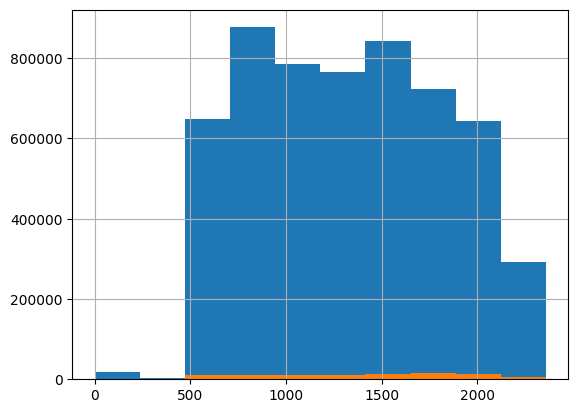

In [74]:
# 연속형 칼럼별 값에 따른 취소 비율 확인하기
continuous_cols = ['CRSDepTime', 'CRSElapsedTime','Distance','CRSArrTime',]
print(df.groupby('Cancelled')[continuous_cols[0]].hist())

Cancelled
False    Axes(0.125,0.11;0.775x0.77)
True     Axes(0.125,0.11;0.775x0.77)
Name: CRSElapsedTime, dtype: object


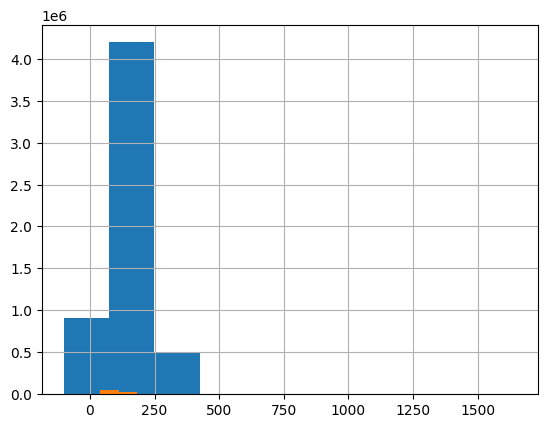

In [75]:
print(df.groupby('Cancelled')[continuous_cols[1]].hist())

Cancelled
False    Axes(0.125,0.11;0.775x0.77)
True     Axes(0.125,0.11;0.775x0.77)
Name: Distance, dtype: object


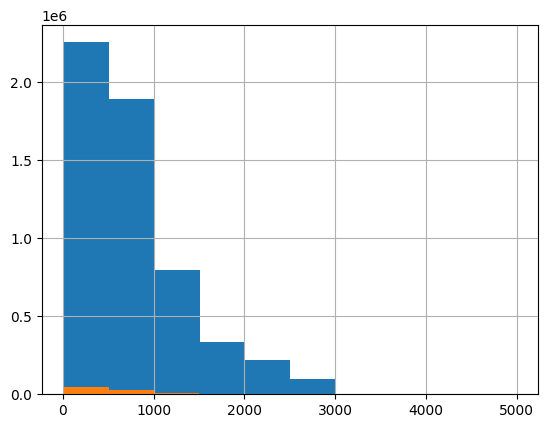

In [76]:
print(df.groupby('Cancelled')[continuous_cols[2]].hist())

Cancelled
False    Axes(0.125,0.11;0.775x0.77)
True     Axes(0.125,0.11;0.775x0.77)
Name: CRSArrTime, dtype: object


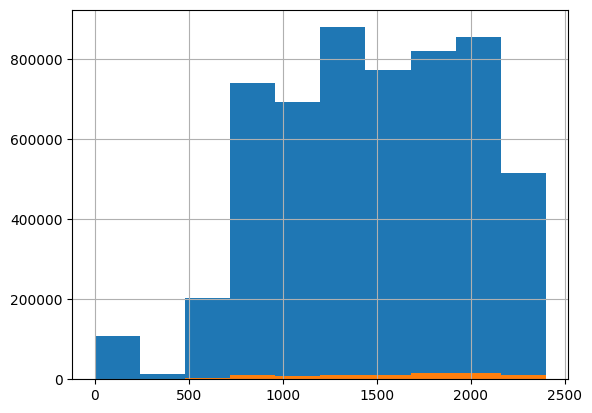

In [77]:
print(df.groupby('Cancelled')[continuous_cols[3]].hist())

### 범주형 변수 칼럼 별 결과 확인
- 범주가 상대적으로 적은 칼럼들
  - 'Airline',  'DayofMonth', 'DayOfWeek', 'IATA_Code_Marketing_Airline', 'IATA_Code_Operating_Airline',  'OriginStateName',  'DestStateName', 'DepTimeBlk', 'ArrTimeBlk','DistanceGroup', 'Quarter', 'Month', 'DivAirportLandings'

- 범주가 상대적으로 많은 칼럼들
  - Origin 370 ,
Dest 370,
Flight_Number_Marketing_Airline 7151,
Tail_Number 6094,
OriginAirportSeqID 386 / DestAirportSeqID 386,
OriginCityMarketID 346 / DestCityMarketID 346,
OriginCityName 364  / DestCityName 364



In [102]:
# 범주가 상대적으로 적은 칼럼들
cate_cols = ['Airline',  'DayofMonth', 'DayOfWeek',  'OriginStateName',  'DestStateName', 'DepTimeBlk', 'ArrTimeBlk','DistanceGroup', 'Quarter', 'Month', 'DivAirportLandings']
# 범주가 상대적으로 많은 칼럼들
lots_cate_cols = ['Origin', 'Dest' , 'Flight_Number_Marketing_Airline', 'Tail_Number','OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName','DestAirportSeqID', 'DestCityMarketID', 'DestCityName',]

In [ ]:
for col in cate_cols:
  print(df.groupby(col)['Cancelled'].mean().sort_values(ascending = False))
  print('')

In [ ]:
for col in lots_cate_cols:
  print(df.groupby(col)['Cancelled'].mean().sort_values(ascending = False))
  print('')

In [138]:
df['Cancelled'].mean()*1000

15.532130448171277

In [ ]:
origin_list = ["Flight_Number_Marketing_Airline", 'Tail_Number', 'Airline', ]
for col in origin_list:
  print(df.groupby(col)['Cancelled'].mean().sort_values(ascending = False))
  print('')

In [7]:
import pandas as pd
df = pd.read_csv('/content/dropcols.csv')

In [8]:
# 2차 칼럼 삭제
df= df[[  'Origin', 'Dest', 'Cancelled', 'Diverted',
         'DayofMonth', 'DayOfWeek',
        'Tail_Number',
       'DepTimeBlk', 'ArrTimeBlk', 'DistanceGroup', 'Quarter',
       'Month', 'DivAirportLandings']]

## Encoding
-  'Origin', 'Dest', 'Cancelled', 'Diverted',        'DayofMonth', 'DayOfWeek',        'Tail_Number',        'DepTimeBlk', 'ArrTimeBlk', 'DistanceGroup', 'Quarter',       'Month', 'DivAirportLandings'

In [10]:
flight_df = df[[  'Origin', 'Dest', 'Cancelled', 'Diverted',
         'DayofMonth', 'DayOfWeek',
        'Tail_Number',
       'DepTimeBlk', 'ArrTimeBlk', 'DistanceGroup', 'Quarter',
       'Month', 'DivAirportLandings']]
flight_df.reset_index(inplace = True, drop = True)

### 1. Origin & Dest ,  Tail_Number,'DepTimeBlk', 'ArrTimeBlk'
- 각각 값 별로 Cancelled 비율 확인 후 내림차순으로 정렬
- 내림 차순 정렬 후 일정 값을 곱하고 반올림한 값 생성
  - 일정값 ( 1000, 1000 , 100
- 해당 값대로 새롭게 순서형 칼럼을 생성

In [71]:
import numpy as np
temp = flight_df.groupby('Tail_Number')['Cancelled'].mean().sort_values(ascending = False)
temp_df = pd.DataFrame(columns = ['Tail_Number','rate'])
temp_df['Tail_Number']= temp.index
temp_df['rate']= temp.values
temp_df['big_rate']= np.round(temp.values*1000)
temp_df['big_rate'] = temp_df['big_rate'].astype('int')
temp_df['label']=''
temp_df

,Tail_Number,rate,big_rate,label
0,N686PA,1.000000,1000,
1,N805H,1.000000,1000,
2,N685PA,1.000000,1000,
3,N1612T,0.333333,333,
4,N462PA,0.206349,206,
...,...,...,...,...
6088,N87360,0.000000,0,
6089,N581HA,0.000000,0,
6090,N582HA,0.000000,0,
6091,N8732S,0.000000,0,


In [54]:
lab = 0
for j in range(len(temp_df)):
  if j== 0:
    temp_df['label'][j]= lab

  else :
    if temp_df['big_rate'][j]== temp_df['big_rate'][j-1]:
      temp_df['label'][j]= lab
    else :
      lab +=1
      temp_df['label'][j]= lab

<ipython-input-54-fd3f76f4b43a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['label'][j]= lab
<ipython-input-54-fd3f76f4b43a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['label'][j]= lab
<ipython-input-54-fd3f76f4b43a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['label'][j]= lab


In [55]:
flight_df['Enc_Dest']= ''

In [56]:
temp_df

,Dest,rate,big_rate,label
0,JHM,0.152593,153,0
1,DUT,0.110092,110,1
2,PGV,0.087363,87,2
3,FLO,0.084095,84,3
4,MMH,0.082589,83,4
...,...,...,...,...
365,BTM,0.000000,0,62
366,PPG,0.000000,0,62
367,ROP,0.000000,0,62
368,SMX,0.000000,0,62


In [57]:
for i in range(len(temp_df)):
  ogn = temp_df['Dest'][i]
  idx = flight_df[flight_df['Dest']== ogn].index
  for j in idx:
    flight_df.at[j, 'Enc_Dest']= temp_df['label'][i]


### 2. Cancelled & Diverted
- bool 변수로 0,1 변수로 바꾸기

In [19]:
flight_df['Cancelled']=flight_df['Cancelled']*1
flight_df['Diverted']=flight_df['Diverted']*1

In [21]:
flight_df = flight_df [[  'Origin', 'Dest', 'Cancelled', 'Diverted',
         'DayofMonth', 'DayOfWeek',
        'Tail_Number',
       'DepTimeBlk', 'ArrTimeBlk', 'DistanceGroup', 'Quarter',
       'Month', 'DivAirportLandings']]

## Scaling
- 이진변수는 스케일링 진행 안함
- Enc_Tail_Number만 예외
- 나머지는 MinMaxScaler 진행

In [62]:
enc_df = flight_df[[ 'Cancelled', 'Diverted']]
enc_df

,Cancelled,Diverted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5689427,0,0
5689428,0,0
5689429,0,0
5689430,0,0


### MinMaxScaler

In [64]:
# 경고무시
import warnings
warnings.filterwarnings(action  = 'ignore')

In [68]:
flight_df[['DayofMonth', 'DayOfWeek',
       'DistanceGroup', 'Quarter',
       'Month', 'DivAirportLandings', 'Enc_Tail_Number', 'Enc_DepTimeBlk',
       'Enc_ArrTimeBlk', 'Enc_Origin', 'Enc_Dest']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689432 entries, 0 to 5689431
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   DayofMonth          int64  
 1   DayOfWeek           int64  
 2   DistanceGroup       int64  
 3   Quarter             int64  
 4   Month               int64  
 5   DivAirportLandings  float64
 6   Enc_Tail_Number     object 
 7   Enc_DepTimeBlk      object 
 8   Enc_ArrTimeBlk      object 
 9   Enc_Origin          object 
 10  Enc_Dest            object 
dtypes: float64(1), int64(5), object(5)
memory usage: 477.5+ MB


In [72]:
flight_df = flight_df.astype({'Enc_DepTimeBlk':'int'})
flight_df = flight_df.astype({'Enc_ArrTimeBlk':'int'})
flight_df = flight_df.astype({'Enc_Origin':'int'})
flight_df = flight_df.astype({'Enc_Dest':'int'})

In [73]:
# MinMax Scaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
cols = [ 'DayofMonth', 'DayOfWeek',
       'DistanceGroup', 'Quarter',
       'Month', 'DivAirportLandings',  'Enc_DepTimeBlk',
       'Enc_ArrTimeBlk', 'Enc_Origin', 'Enc_Dest']
for col in cols:
  #2차원 ndarray로 변환
  items = np.array(flight_df[col]).reshape(-1,1)

  # 변형 객체 생성
  minmax_scaler = MinMaxScaler()

  # 훈련데이터의 모수 분포 저장
  minmax_scaler.fit(items)

  # 훈련 데이터 스케일링
  items_scaled = minmax_scaler.transform(items)

  #transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
  items_df_scaled = pd.DataFrame(data=items_scaled)

  # 칼럼 추가
  feat_name = 'Scaled'+col
  enc_df[feat_name]= items_scaled

### Standard Scaler

In [78]:
tail_index = flight_df[flight_df['Enc_Tail_Number']==''].index
tail_index

Int64Index([  18235,   21085,   21107,   21116,   21982,   31271,   31272,
              31790,   32193,   32621,
            ...
            5687680, 5688296, 5688303, 5688310, 5688345, 5688397, 5688503,
            5688644, 5688706, 5688712],
           dtype='int64', length=20547)

In [80]:
flight_df.loc[tail_index, ['Enc_Tail_Number']] = -1
flight_df = flight_df.astype({'Enc_Tail_Number':'int'})

In [82]:
# Standard Scaler
import numpy as np
from sklearn.preprocessing import StandardScaler
cols = ["Enc_Tail_Number"]
for col in cols:
  #2차원 ndarray로 변환
  items = np.array(flight_df[col]).reshape(-1,1)

  # 변형 객체 생성
  standard_scaler = StandardScaler()

  # 훈련데이터의 모수 분포 저장
  standard_scaler.fit(items)

  # 훈련 데이터 스케일링
  items_scaled = standard_scaler.transform(items)

  #transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
  items_df_scaled = pd.DataFrame(data=items_scaled)


  # 칼럼 추가
  feat_name = 'Standard_Scale_'+col
  enc_df[feat_name]= items_scaled

In [86]:
enc_df.to_csv('final_csv.csv', index =False)

# 2.평가지표에 대한 임계값을 조절하면서 변화를 정리하자. (모델은 로지스틱으로 진행)
- 로지스틱에 있는 위의 임계값을 조절해서 실제 매트릭스가 어떤 식으로 변하는지를 정리
 - 정확도, 정밀도, 재현율, ROC, AUC 까지 시각화를 통해 어떤 식으로 변화하는지 정리 필수

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
final_df = enc_df

In [91]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop('Cancelled',axis=1), final_df['Cancelled'], test_size=0.3, random_state=111)

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}'.format(accuracy, precision, recall))
    return accuracy, precision, recall

In [107]:
# 임계값에 따른 오차행렬, 정확도, 정밀도, 재현율 변화 확인!
from sklearn.preprocessing import Binarizer
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
Ir_clf = LogisticRegression(solver='liblinear')
Ir_clf.fit(X_train,y_train)
pred_proba = Ir_clf.predict_proba(X_test)

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 차례로 iteration 하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        acc, prec, recal= get_clf_eval(y_test, custom_predict)
        print('')
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[1680017     377]
 [  19961    6475]]
정확도: 0.9881, 정밀도:0.9450, 재현율:0.2449

임곗값: 0.45
오차 행렬
[[1680060     334]
 [  19967    6469]]
정확도: 0.9881, 정밀도:0.9509, 재현율:0.2447

임곗값: 0.5
오차 행렬
[[1680083     311]
 [  19969    6467]]
정확도: 0.9881, 정밀도:0.9541, 재현율:0.2446

임곗값: 0.55
오차 행렬
[[1680104     290]
 [  19971    6465]]
정확도: 0.9881, 정밀도:0.9571, 재현율:0.2446

임곗값: 0.6
오차 행렬
[[1680138     256]
 [  19974    6462]]
정확도: 0.9881, 정밀도:0.9619, 재현율:0.2444



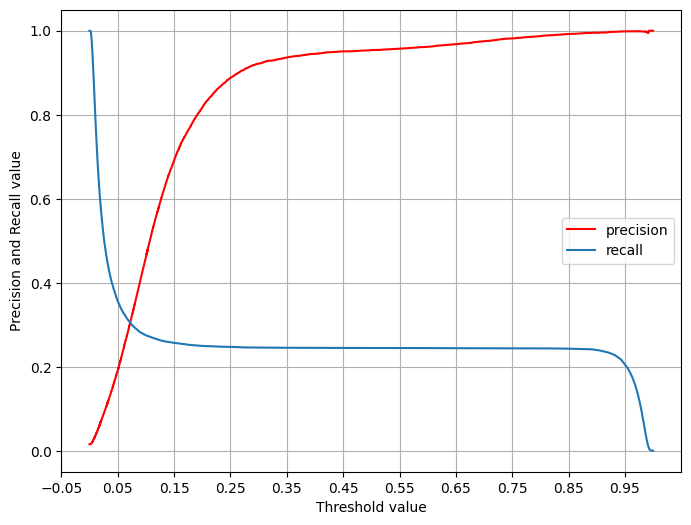

In [108]:
from sklearn.metrics import precision_recall_curve
pred_proba_class1 = Ir_clf.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # thredshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    #X축을 thredshold 값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precision[0:threshold_boundary],  "r", label="precision")
    plt.plot(thresholds, recalls[0:threshold_boundary], label ='recall')
    plt.plot()
    #thredshold 값 X축 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    #X축, y축, label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, Ir_clf.predict_proba(X_test)[:,1])

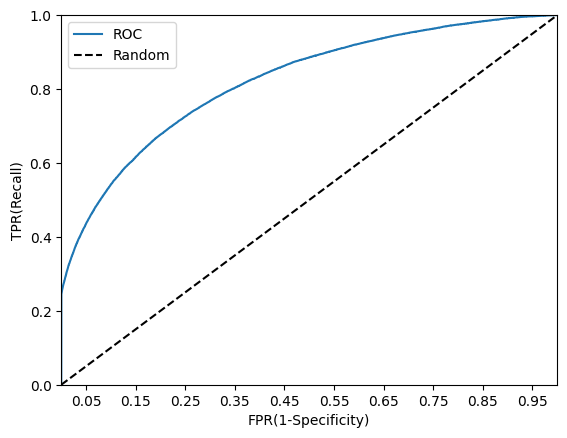

In [109]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test, pred_proba_c1):
    #임곗값에 따른 FPR, TPR값을 반환받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    #ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')

    #FPR X축의 Scale을 0.1 단위로 변경, X,Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)');plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

In [110]:
from sklearn.metrics import roc_auc_score

pred_proba = Ir_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값:{0:.4f}'.format(roc_score))

ROC AUC 값:0.8213


# 3.모델간의 비교 진행하기
- 로지스틱, DT, RF, KNN 중 3개의 모델을 가지고 직접 모델링을 진행하고
평가지표에 대한 비교 정리와 ROC 커브에 대한 시각화를 통해 어떤 모델을 선정할지 기준점 잡기

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
models = ['LR','DT','RT']

In [3]:
for model in models:
  print(model)
  if model == 'LR':
    Ir_clf = LogisticRegression(solver='liblinear')
    Ir_clf.fit(X_train,y_train)
  elif model == 'DT':
    pass
  elif model == 'RT' :
    pass
  pred = Ir_clf.predict(X_test)
  acc, pre, recal = get_clf_eval(y_test,pred)

NameError: ignored